##AI Ethic

定义： a set of values, principles and techniques that **employ widely accepted standards** of 'right' and 'wrong' to **guide the development and use of AI technologies**.

**Potential Harm**:
1. privacy problem
2. biased or unfair decision or recommendation
3. 决策的不可解释性
4. 出问题时是谁来担责？(人还是AI)
5. 做出的decision和recommendation不好

**七项原则(from EU)**：
1. 有人类监督
2. Technical robustness and safety
3. Privacy和数据管理
4. 透明性
5. Diversity, non-discrimination and fairness
6. 从整体上造福社会
7. 出问题可以追责

**三条主要问题**:
1. **Data Ethics** (privacy issue, consent needed...)
2. **AI Model Fairness**
3. **AI Model Monitoring and Maintenance**

**五条基本原则：**
1. Autonomy: 有人来监管
2. Beneficence: 于社会有益
3. Non-maleficence: 没有危害
4. Justice: 公平
5. Explicability: 可解释性

In [ ]:
import numpy as np
def apply_circle_mask(img, center_x, center_y):
  h, w = img.shape
  mask1 = np.arange(0, h)
  mask2 = np.arange(0, w)
  diff_x = mask1 - center_x
  diff_y = mask2 - center_y
  mask = ((diff_x**2)[:, None] + (diff_y**2)[None, :]) < 10000
  img_masked = img * mask
  return img_masked

def img_flatten_conv_1d(img, v):
  h, w = img.shape
  zeros = np.zeros((h, 1))
  # pad 0 in the left and right
  # image_padded.shape = (h, w + 2)
  image_padded = np.concatenate((zeros, img, zeros), axis = 1)
  img_flat = image_padded.reshape(h * (w + 2))
  img_bur = np.convolve(img_flat, v, 'valid')
  # pad
  img_bur = np.concatenate(([0], img_bur, [0]))
  img_bur = img_bur.reshape(h, w + 2)
  return img_bur

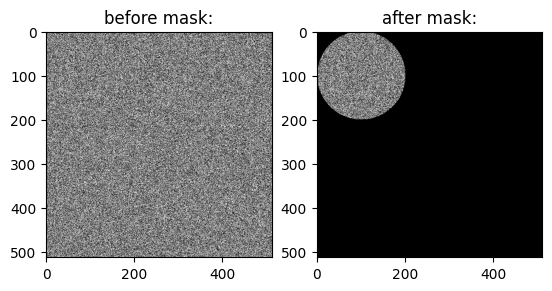

In [ ]:
import matplotlib.pyplot as plt
if __name__ == '__main__':
  img = np.random.randint(0, 256, size=(512, 512), dtype=np.uint8)
  img_masked = apply_circle_mask(img, 100, 100)
  plt.subplot(1, 2, 1)
  plt.imshow(img, 'gray')
  plt.title("before mask:")
  plt.subplot(1, 2, 2)
  plt.imshow(img_masked, 'gray')
  plt.title('after mask:')
  plt.show()

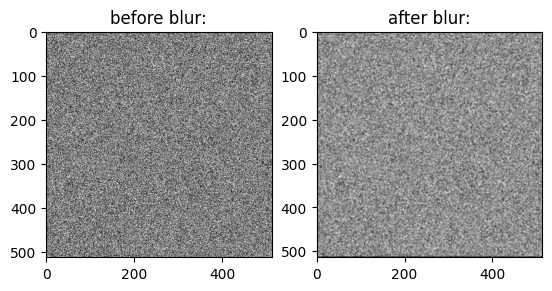

In [ ]:
if __name__ == '__main__':
  img = np.random.randint(0, 256, size=(512, 512), dtype=np.uint8)
  v = np.array([1/3, 1/3, 1/3])
  img_blur = img_flatten_conv_1d(img, v)
  img_blur = img_flatten_conv_1d(img_blur.T, v).T
  plt.subplot(1, 2, 1)
  plt.imshow(img, 'gray')
  plt.title("before blur:")
  plt.subplot(1, 2, 2)
  plt.imshow(img_blur, 'gray')
  plt.title('after blur:')
  plt.show()

##Implement Convolution Layer from Scratch

**Dilated Convolution**: (膨胀卷积)

通过skip掉一些pixel的方式，来让这个kernel观察到一些更宏观的feature

示例：
$$ I = \left(\begin{matrix} 1 & 2 & 3 & 4 & 5 \\ 6 & 7 & 8 & 9 & 10 \\ 11 & 12 & 13 & 14 & 15 \\ 16 & 17 & 18 & 19 & 20 \\ 21 & 22 & 23 & 24 & 25 \end{matrix}\right)$$
And we have kernel $K$:
$$ K = \left(\begin{matrix} 1 & 0 & 1 \\ 1 & 0 & 1 \\ 1 & 0 & 1 \end{matrix}\right)$$
When **dilation rate = 2**, our kernel will skip some value in the original image $I$.

For example, $K[0][0]$ will correspond to $I[0][0]$, $K[0][1]$ will correspond to $I[0][2]$, and $K[0][2]$ will correspond to $I[0][4]$. So, the kernel will skip $I[0][1]$ and $I[0][3]$

这样一来，with dilation rate = 2，我们的3 $\times$ 3 kernel能拥有和5 $\times$ 5 kernel一样的观察范围

##Formula for Dilation Convolution
How to calculate output size?
$$\text{output size} = \frac{\text{input size} - (\text{kernel size} - 1) * \text{dilated rate} - 1 + \text{padding} * 2}{\text{strides}} + 1$$

In [ ]:
from typing import dataclass_transform
import numpy as np
def dilated_convolution(img, kernel, dilation_rate = 1, stride = 1, padding = 'valid'):
  # padding:
  if padding == 'same':
    # here we use floor division, inorder to return int type
    pad = ((kernel.shape[0] - 1) * dilation_rate + 1) // 2
    padded_input = np.pad(img, ((pad, pad), (pad, pad)), mode = 'constant')
  else:
    padded_input = img
  # 计算output shape
  # here we use floor division, inorder to return int type
  output_rows = (img.shape[0] - (kernel.shape[0] - 1) * dilation_rate - 1 + 2 * pad) // stride + 1
  output_cols = (img.shape[1] - (kernel.shape[1] - 1) * dilation_rate - 1 + 2 * pad) // stride + 1
  # get kernel shape:
  kernel_rows, kernel_cols = kernel.shape

  # 初始化output array
  output_array = np.zeros((output_rows, output_cols))

  # 开始卷积：
  for i in range(kernel_rows):
    for j in range(kernel_cols):
      # 计算indices
      input_row_indices = np.arange(0, output_rows * stride, stride) + i * dilation_rate
      input_col_indices = np.arange(0, output_cols * stride, stride) + j * dilation_rate
      # 执行convolution:
      output_array += kernel[i, j] * padded_input[np.ix_(input_row_indices, input_col_indices)]
  return output_array

In [ ]:
if __name__ == '__main__':
  input_array = np.array(np.arange(100).reshape(10,10))
  kernel = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
  dilation_rate = 2
  stride = 2
  padding = 'same'
  output_array = dilated_convolution(input_array, kernel, dilation_rate, stride, padding)
  print(output_array)

[[ 22.  26.  30.  34.   8.]
 [ 62.  66.  72.  78.  34.]
 [102. 126. 132. 138.  74.]
 [142. 186. 192. 198. 114.]
 [ 80. 142. 146. 150. 154.]]


In [34]:
# Implement Dropout Layer
def dropout(input_array, p):
 mask = np.random.rand(input_array.shape[0], input_array.shape[1]) < p
 return input_array * mask

In [35]:
if __name__ == '__main__':
  array = np.arange(12).reshape(3, 4)
  print("after dropout:\n", dropout(array, 0.4))

after dropout:
 [[ 0  0  0  3]
 [ 4  0  6  0]
 [ 8  0 10 11]]
